# Airbnb Dataset – Data Cleaning & Analysis



In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [25]:
bdf = pd.read_csv('AirBNB(4).csv')
bdf

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.082422e+07,https://www.airbnb.com/rooms/40824219,2.025100e+13,02-10-2025,city scrape,Room close to Manhattan for FEMALE guests,This cozy spacious room includes a twin size b...,Sunnyside is a safe residental area. <br />The...,https://a0.muscache.com/pictures/hosting/Hosti...,317540555,...,4.88,4.94,4.69,NaN,f,3,0,3,0,0.23
1,4.083319e+07,https://www.airbnb.com/rooms/40833186,2.025100e+13,02-10-2025,previous scrape,Soho LES East village private room downtown,NaN,NaN,https://a0.muscache.com/pictures/1f093bbc-936c...,68718914,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
2,4.083714e+07,https://www.airbnb.com/rooms/40837137,2.025100e+13,02-10-2025,previous scrape,Sunset Park - Quiet and close to subway!,"Cozy, lovely bedroom with a comfortable full s...",the sunset park of Brooklyn,https://a0.muscache.com/pictures/01c4e91e-4012...,317770098,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.01
3,4.083802e+07,https://www.airbnb.com/rooms/40838018,2.025100e+13,02-10-2025,previous scrape,Cozy One Bedroom in Clinton Hill,This sunny one-bedroom apartment is located in...,Clinton Hill is one of the best neighborhoods ...,https://a0.muscache.com/pictures/9322d54a-6eb7...,17211451,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.01
4,4.083942e+07,https://www.airbnb.com/rooms/40839416,2.025100e+13,02-10-2025,city scrape,🪴XL dojo 🌾 shared green yogi palace apt 🌿,"New York City living at its best. A massive, c...",Live like the Ramones > The East Village is st...,https://a0.muscache.com/pictures/hosting/Hosti...,4765305,...,5.00,5.00,4.95,NaN,f,8,0,8,0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36106,1.518150e+18,https://www.airbnb.com/rooms/1518145740023617475,2.025100e+13,02-10-2025,city scrape,Prime LES 2BR on Essex Street by Roomrs,Stylish 2-bedroom walk-up on vibrant Essex St ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,488616033,...,NaN,NaN,NaN,NaN,t,33,33,0,0,NaN
36107,1.518190e+18,https://www.airbnb.com/rooms/1518194647322488321,2.025100e+13,02-10-2025,city scrape,New Listing! Fully Renovated Gorgeous UES 1BR,"Newly & fully renovated, fully furnished 1 bed...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,49095662,...,NaN,NaN,NaN,NaN,t,15,15,0,0,NaN
36108,1.518230e+18,https://www.airbnb.com/rooms/1518232643177537314,2.025100e+13,02-10-2025,city scrape,Charming UES 1BR Duplex Near Central Park,Fully furnished 1 bed / 1 bath duplex availabl...,"Located at 83rd & Lexington Ave, this upscale ...",https://a0.muscache.com/pictures/prohost-api/H...,205760,...,NaN,NaN,NaN,NaN,f,20,20,0,0,NaN
36109,1.518350e+18,https://www.airbnb.com/rooms/1518345023898568625,2.025100e+13,02-10-2025,city scrape,45 west 81st 1 bedroom,You'll have a great time at this comfortable p...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,51501835,...,NaN,NaN,NaN,NaN,f,239,239,0,0,NaN


### Checking basic information about the dataset

In [45]:
bdf.duplicated().sum()

np.int64(37)

In [27]:
bdf = bdf.drop_duplicates()


In [28]:
bdf.duplicated().sum()

np.int64(0)

In [29]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36111 non-null  float64
 1   listing_url                                   36111 non-null  object 
 2   scrape_id                                     36111 non-null  float64
 3   last_scraped                                  36111 non-null  object 
 4   source                                        36111 non-null  object 
 5   name                                          36109 non-null  object 
 6   description                                   35153 non-null  object 
 7   neighborhood_overview                         18704 non-null  object 
 8   picture_url                                   36111 non-null  object 
 9   host_id                                       36111 non-null 

### Checking missing values

In [30]:
bdf.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               11188
Length: 79, dtype: int64

### Dropping unnecessary columns

In [31]:
bdf = bdf.drop(columns=[
'neighbourhood_cleansed','neighbourhood_group_cleansed',
'host_id','host_url','host_name','host_location','host_about',
'host_response_time','host_response_rate','host_acceptance_rate',
'host_is_superhost','host_thumbnail_url','host_picture_url',
'host_neighbourhood','host_verifications','host_listings_count',
'host_total_listings_count','host_has_profile_pic','host_identity_verified',
'listing_url','scrape_id','last_scraped','picture_url'
], errors='ignore')

### Checking missing values again

In [32]:
bdf.isnull().sum()

id                                                  0
source                                              0
name                                                2
description                                       958
neighborhood_overview                           17407
host_since                                       1167
neighbourhood                                   17406
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       14411
bathrooms_text                                    114
bedrooms                                         5949
beds                                            14468
amenities                                           0
price                                           14783
minimum_nights              

### Handling missing values

In [33]:
bdf['bathrooms'] = bdf['bathrooms'].fillna(bdf['bathrooms'].mean())
bdf['bedrooms'] = bdf['bedrooms'].fillna(bdf['bedrooms'].mean())
bdf['beds'] = bdf['beds'].fillna(bdf['beds'].mean())
bdf['reviews_per_month'] = bdf['reviews_per_month'].fillna(0)

### Cleaning price column

In [34]:
bdf['price'] = bdf['price'].str.replace('$', '', regex=False)
bdf['price'] = bdf['price'].str.replace(',', '', regex=False)
bdf['price'] = bdf['price'].astype(float)

### Creating a new column

In [35]:
bdf['price_per_person'] = bdf['price'] / bdf['accommodates']

### Some text columns had emojis and special characters, so I removed non-English characters to clean the text data.

In [37]:
for col in bdf.select_dtypes(include='object').columns:
    bdf[col] = bdf[col].astype(str).str.replace(r'[^\x00-\x7F]+', '', regex=True)


### Final dataset preview

In [38]:
bdf

,id,source,name,description,neighborhood_overview,host_since,neighbourhood,latitude,longitude,property_type,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_person
0,4.082422e+07,city scrape,Room close to Manhattan for FEMALE guests,This cozy spacious room includes a twin size b...,Sunnyside is a safe residental area. <br />The...,14-12-2019,Neighborhood highlights,40.746980,-73.917630,Private room in townhouse,...,4.94,4.69,nan,f,3,0,3,0,0.23,66.000000
1,4.083319e+07,previous scrape,Soho LES East village private room downtown,nan,nan,24-04-2016,nan,40.723140,-73.993230,Private room in serviced apartment,...,NaN,NaN,nan,t,1,0,1,0,0.00,NaN
2,4.083714e+07,previous scrape,Sunset Park - Quiet and close to subway!,"Cozy, lovely bedroom with a comfortable full s...",the sunset park of Brooklyn,15-12-2019,Neighborhood highlights,40.646070,-74.005520,Private room in home,...,5.00,5.00,nan,f,1,0,1,0,0.01,NaN
3,4.083802e+07,previous scrape,Cozy One Bedroom in Clinton Hill,This sunny one-bedroom apartment is located in...,Clinton Hill is one of the best neighborhoods ...,24-06-2014,Neighborhood highlights,40.683700,-73.961150,Entire rental unit,...,5.00,5.00,nan,t,1,1,0,0,0.01,NaN
4,4.083942e+07,city scrape,XL dojo shared green yogi palace apt,"New York City living at its best. A massive, c...",Live like the Ramones > The East Village is st...,19-01-2013,Neighborhood highlights,40.721470,-73.982700,Private room in rental unit,...,5.00,4.95,nan,f,8,0,8,0,0.40,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36106,1.518150e+18,city scrape,Prime LES 2BR on Essex Street by Roomrs,Stylish 2-bedroom walk-up on vibrant Essex St ...,nan,21-11-2022,nan,40.721930,-73.986668,Entire rental unit,...,NaN,NaN,nan,t,33,33,0,0,0.00,43.750000
36107,1.518190e+18,city scrape,New Listing! Fully Renovated Gorgeous UES 1BR,"Newly & fully renovated, fully furnished 1 bed...",nan,15-11-2015,nan,40.777123,-73.956899,Entire rental unit,...,NaN,NaN,nan,t,15,15,0,0,0.00,62.250000
36108,1.518230e+18,city scrape,Charming UES 1BR Duplex Near Central Park,Fully furnished 1 bed / 1 bath duplex availabl...,"Located at 83rd & Lexington Ave, this upscale ...",18-08-2010,Neighborhood highlights,40.777913,-73.957334,Entire rental unit,...,NaN,NaN,nan,f,20,20,0,0,0.00,60.250000
36109,1.518350e+18,city scrape,45 west 81st 1 bedroom,You'll have a great time at this comfortable p...,nan,16-12-2015,nan,40.784140,-73.974890,Entire rental unit,...,NaN,NaN,nan,f,239,239,0,0,0.00,56.666667


# Visualizations

### Price distribution

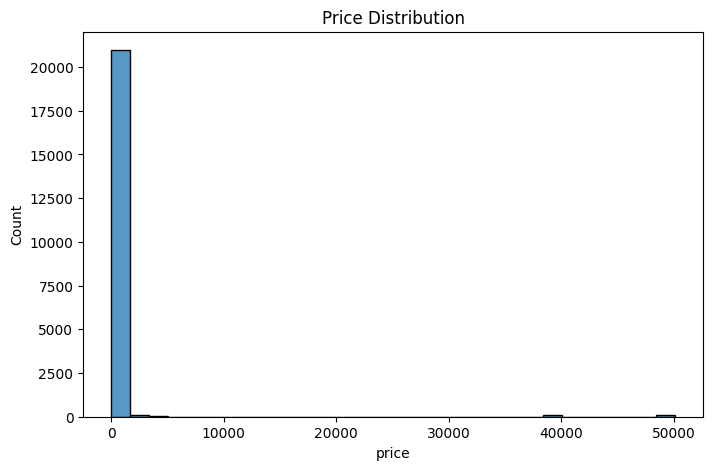

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(bdf['price'], bins=30)
plt.title('Price Distribution')
plt.show()

**Observation:** Most listings fall in the lower price range.

###  Room type count

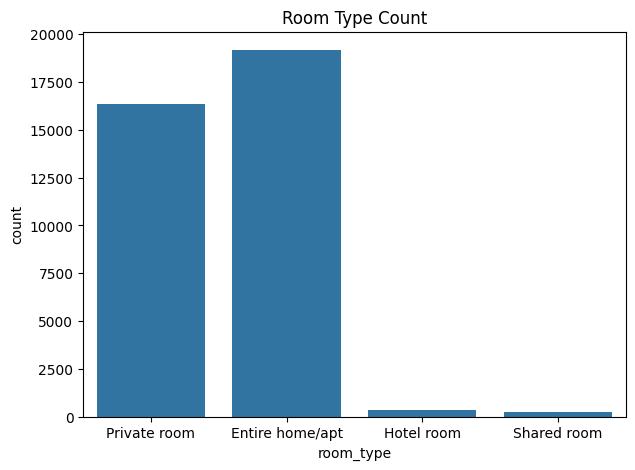

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x='room_type', data=bdf)
plt.title('Room Type Count')
plt.show()

**Observation:** Certain room types are listed more frequently.

###  Property type (Top 10)

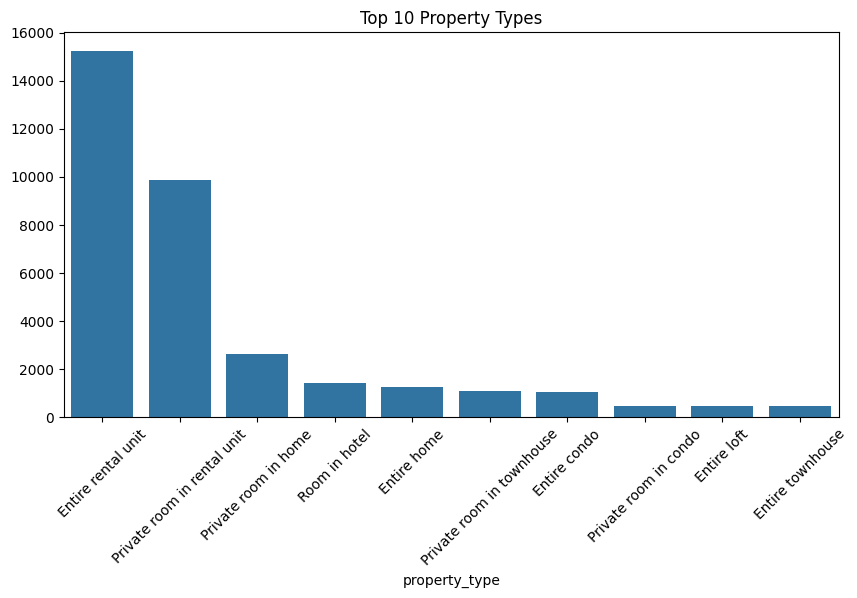

In [41]:
top_property = bdf['property_type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_property.index, y=top_property.values)
plt.xticks(rotation=45)
plt.title('Top 10 Property Types')
plt.show()

**Observation:** A few property types dominate Airbnb listings.

###  Neighbourhood vs average price

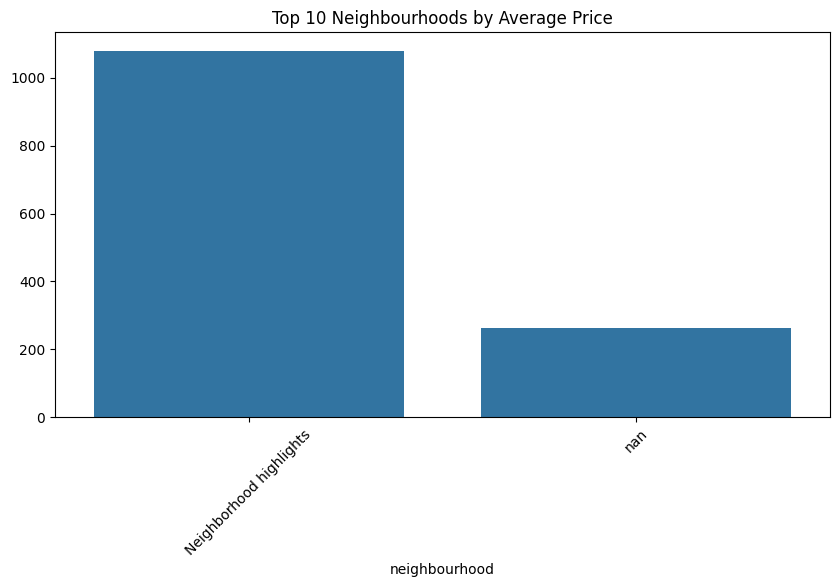

In [46]:
avg_price = bdf.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45)
plt.title('Top 10 Neighbourhoods by Average Price')
plt.show()

**Observation:** Prices vary across different neighbourhoods.

###  Price vs accommodates

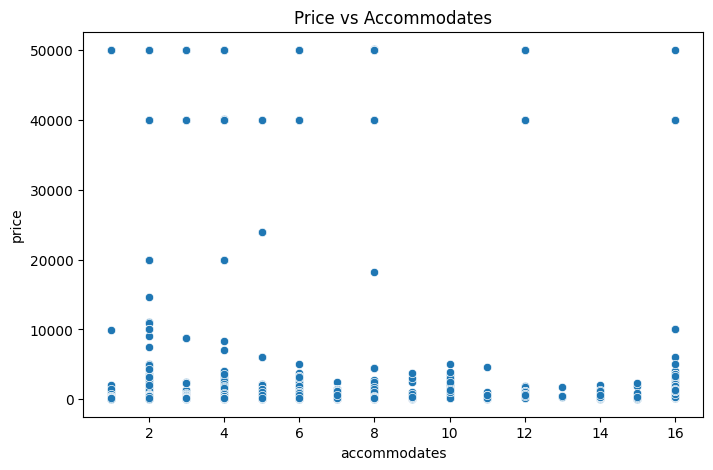

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='accommodates', y='price', data=bdf)
plt.title('Price vs Accommodates')
plt.show()

**Observation:** Price generally increases as accommodation capacity increases.

###  Price per person distribution

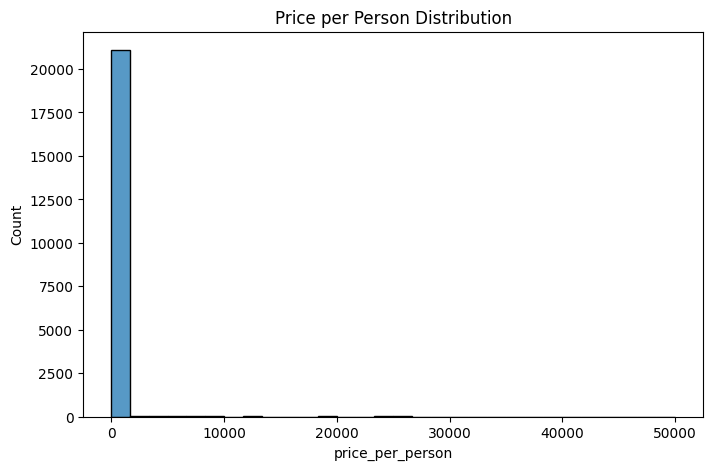

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(bdf['price_per_person'], bins=30)
plt.title('Price per Person Distribution')
plt.show()

**Observation:** Most listings have a lower price per person.

## Summary
From the above observations, I understood that most Airbnb listings are affordable and certain room and property types are more common. 

Prices increase with the number of people accommodated and also vary depending on the neighbourhood.